In [10]:
import pandas as pd 

In [11]:
# Load the datasets from the provided Excel files
credit_risk_1 = pd.read_excel('credit_risk_file_1.xlsx')
credit_risk_2 = pd.read_excel('credit_risk_file_2.xlsx')

# Combine the two datasets into a single DataFrame
credit_risk_data = pd.concat([credit_risk_1, credit_risk_2], ignore_index=True)

Variable Name	                Description

Total_TL	                    Total trade lines/accounts in Bureau
Tot_Closed_TL	                Total closed trade lines/accounts
Tot_Active_TL	                Total active accounts
Total_TL_opened_L6M	            Total accounts opened in last 6 Months
Tot_TL_closed_L6M	            Total accounts closed in last 6 months
pct_tl_open_L6M	                Percent accounts opened in last 6 months
pct_tl_closed_L6M	            Percent accounts closed in last 6 months
pct_active_tl	                Percent active accounts
pct_closed_tl	                Percent closed accounts
Total_TL_opened_L12M	        Total accounts opened in last 12 Months
Tot_TL_closed_L12M	            Total accounts closed in last 12 months
pct_tl_open_L12M	            Percent accounts opened in last 12 months
pct_tl_closed_L12M	            Percent accounts closed in last 12 months
Tot_Missed_Pmnt	                Total missed Payments
Auto_TL	                        Count Automobile accounts
CC_TL	                        Count of Credit card accounts
Consumer_TL	                    Count of Consumer goods accounts
Gold_TL	                        Count of Gold loan accounts
Home_TL	                        Count of Housing loan accounts
PL_TL	                        Count of Personal loan accounts
Secured_TL	                    Count of secured accounts
Unsecured_TL	                Count of unsecured accounts
Other_TL	                    Count of other accounts
Age_Oldest_TL	                Age of oldest opened account
Age_Newest_TL	                Age of newest opened account

In [12]:
credit_risk_data.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5.0,4.0,1.0,0.0,0.0,0.000,0.0,0.200,0.800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,0.0,1.0,0.0,0.0,0.000,0.0,1.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8.0,0.0,8.0,1.0,0.0,0.125,0.0,1.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,0.0,1.0,1.0,0.0,1.000,0.0,1.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3.0,2.0,1.0,0.0,0.0,0.000,0.0,0.333,0.667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Display basic information about the DataFrame
print(credit_risk_data.info())

# Check for missing values in the dataset
print(credit_risk_data.isnull().sum())

# Handle missing values by imputation or dropping 
# For numerical columns, fill missing values with the median of the column
for col in credit_risk_data.select_dtypes(include=['float64', 'int64']).columns:
    credit_risk_data[col].fillna(credit_risk_data[col].median(), inplace=True)

# For categorical columns, fill missing values with the mode of the column
for col in credit_risk_data.select_dtypes(include=['object']).columns:
    credit_risk_data[col].fillna(credit_risk_data[col].mode()[0], inplace=True)

# Confirm that there are no more missing values
print(credit_risk_data.isnull().sum())

# Display the first few rows of the DataFrame to verify changes
print(credit_risk_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102672 entries, 0 to 102671
Data columns (total 87 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   PROSPECTID                    102672 non-null  int64  
 1   Total_TL                      51336 non-null   float64
 2   Tot_Closed_TL                 51336 non-null   float64
 3   Tot_Active_TL                 51336 non-null   float64
 4   Total_TL_opened_L6M           51336 non-null   float64
 5   Tot_TL_closed_L6M             51336 non-null   float64
 6   pct_tl_open_L6M               51336 non-null   float64
 7   pct_tl_closed_L6M             51336 non-null   float64
 8   pct_active_tl                 51336 non-null   float64
 9   pct_closed_tl                 51336 non-null   float64
 10  Total_TL_opened_L12M          51336 non-null   float64
 11  Tot_TL_closed_L12M            51336 non-null   float64
 12  pct_tl_open_L12M              51336 non-null

C:\Users\purnj\AppData\Local\Temp\ipykernel_16436\126705777.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_risk_data[col].fillna(credit_risk_data[col].median(), inplace=True)
C:\Users\purnj\AppData\Local\Temp\ipykernel_16436\126705777.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Data Types of Each Column:
PROSPECTID               int64
Total_TL               float64
Tot_Closed_TL          float64
Tot_Active_TL          float64
Total_TL_opened_L6M    float64
                        ...   
GL_Flag                float64
last_prod_enq2          object
first_prod_enq2         object
Credit_Score           float64
Approved_Flag           object
Length: 87, dtype: object


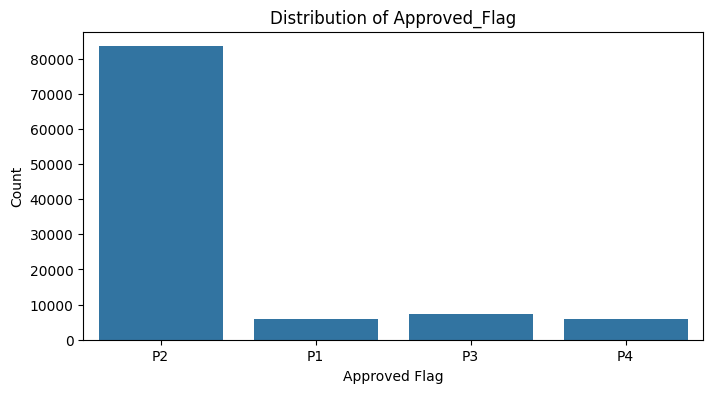

Proportion of Approved and Rejected Applications:
Approved_Flag
P2    0.813610
P3    0.072581
P4    0.057289
P1    0.056520
Name: proportion, dtype: float64


In [14]:
# Analyzing data types and distributions of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

# Display data types of each column
data_types = credit_risk_data.dtypes
print("Data Types of Each Column:")
print(data_types)

# Analyze the distribution of the target variable "Approved_Flag"
plt.figure(figsize=(8, 4))
sns.countplot(x='Approved_Flag', data=credit_risk_data)
plt.title('Distribution of Approved_Flag')
plt.xlabel('Approved Flag')
plt.ylabel('Count')
plt.show()

# Display the proportion of approved and rejected applications
approved_counts = credit_risk_data['Approved_Flag'].value_counts(normalize=True)
print("Proportion of Approved and Rejected Applications:")
print(approved_counts)

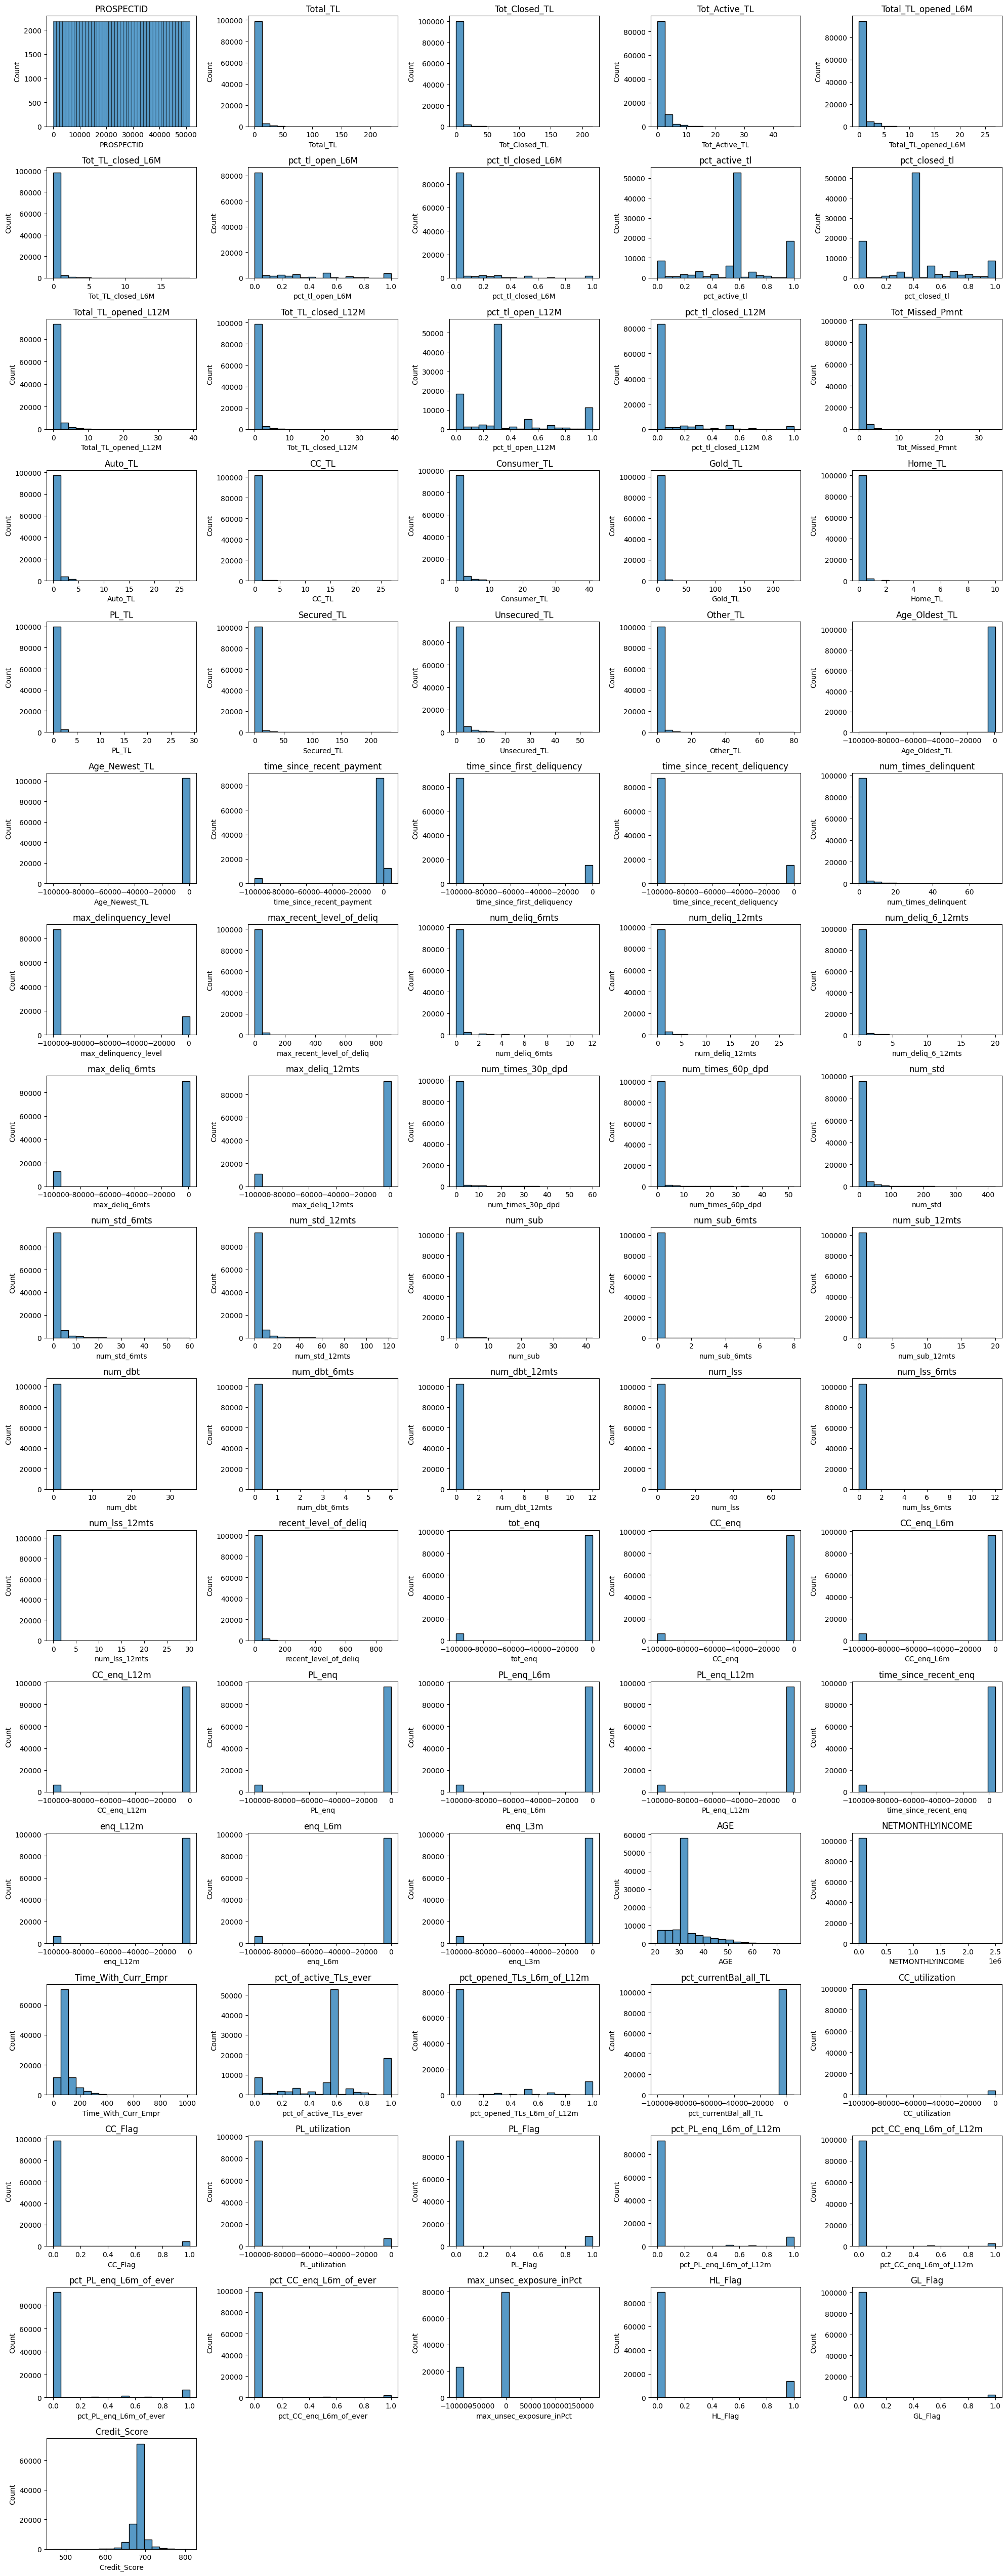

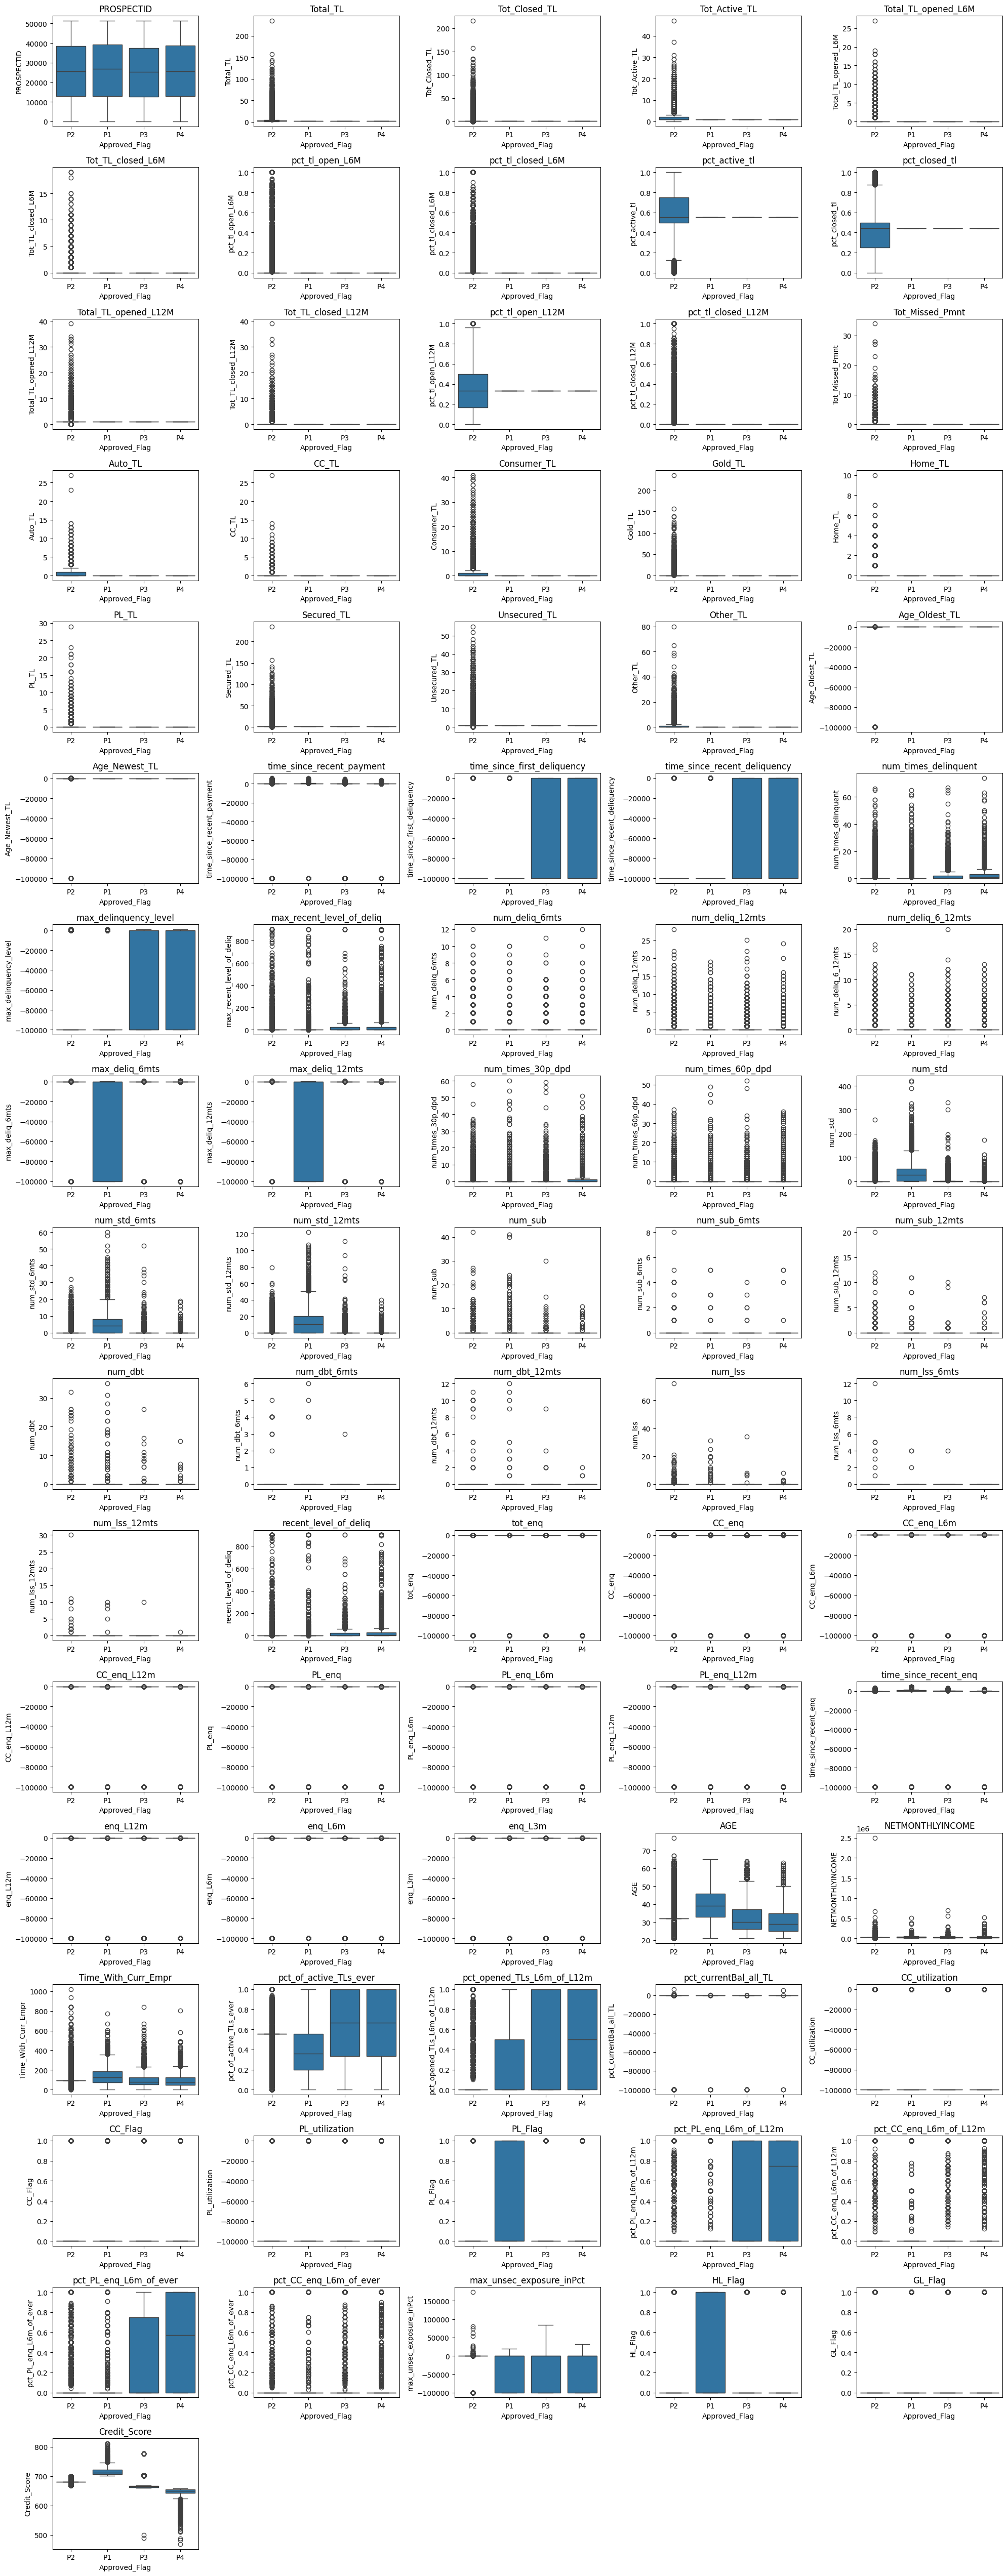

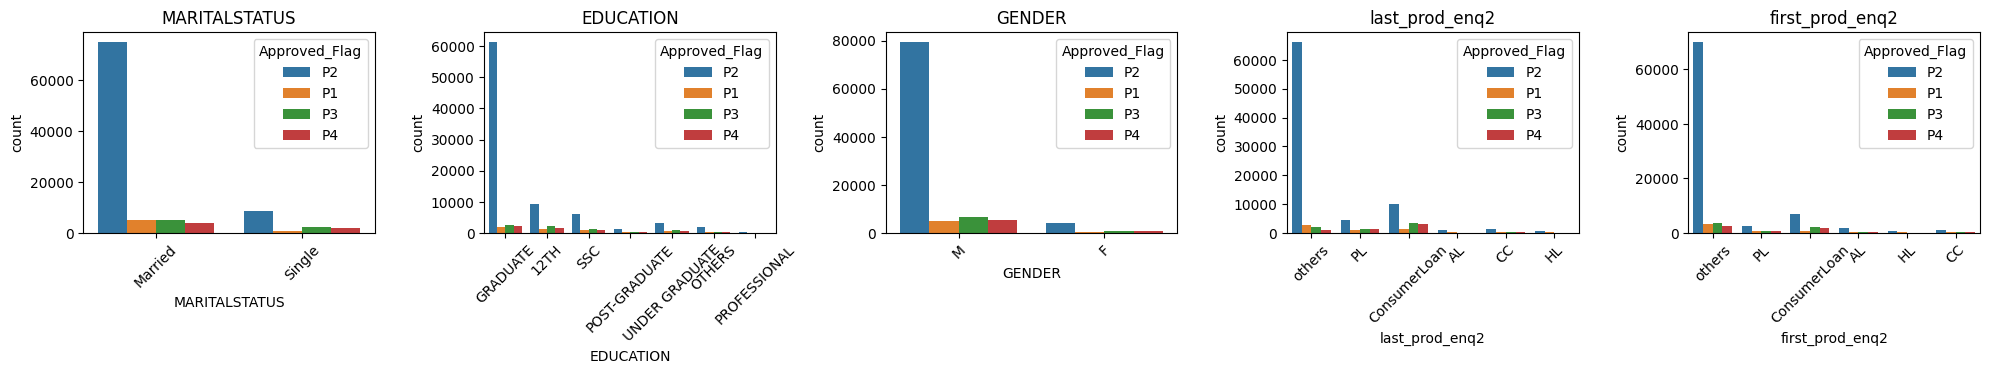

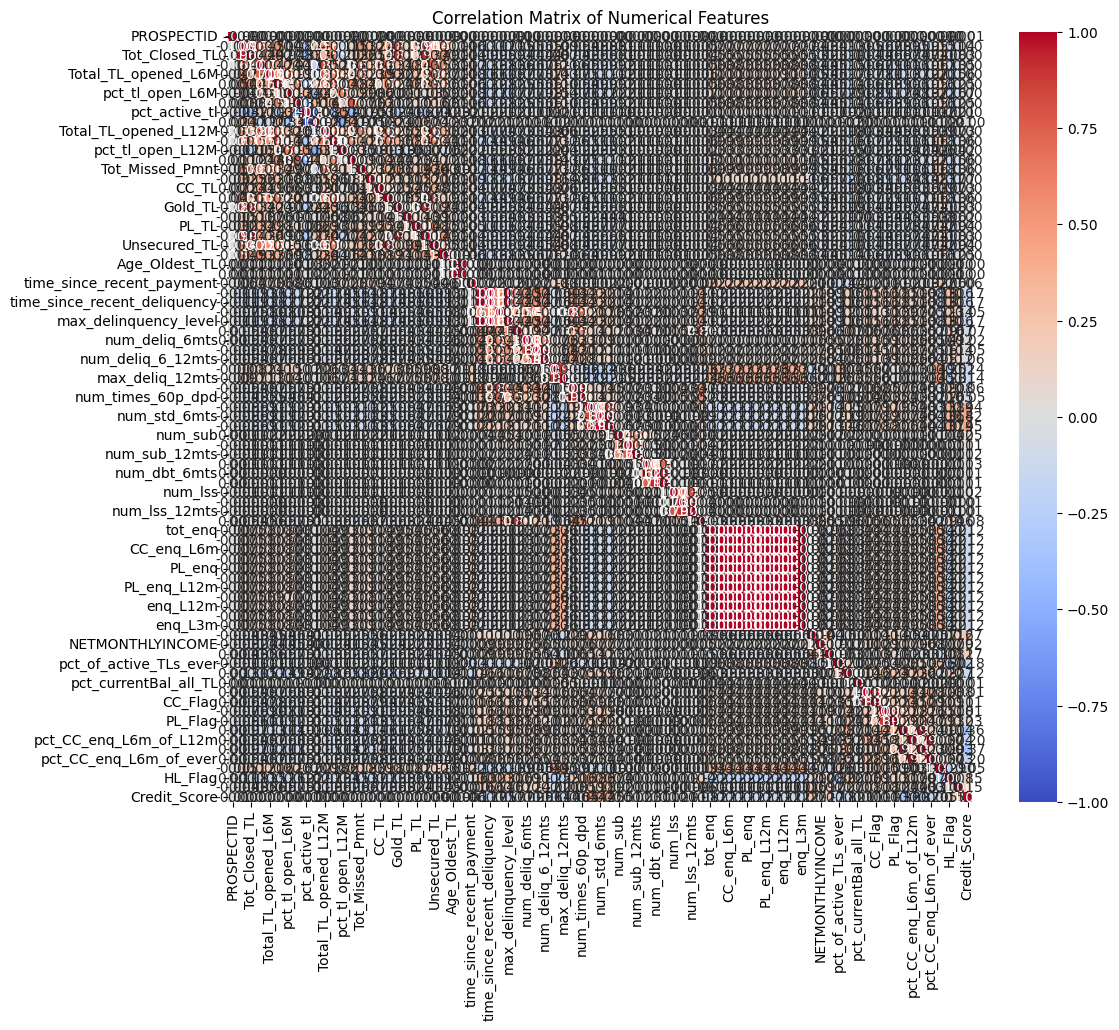

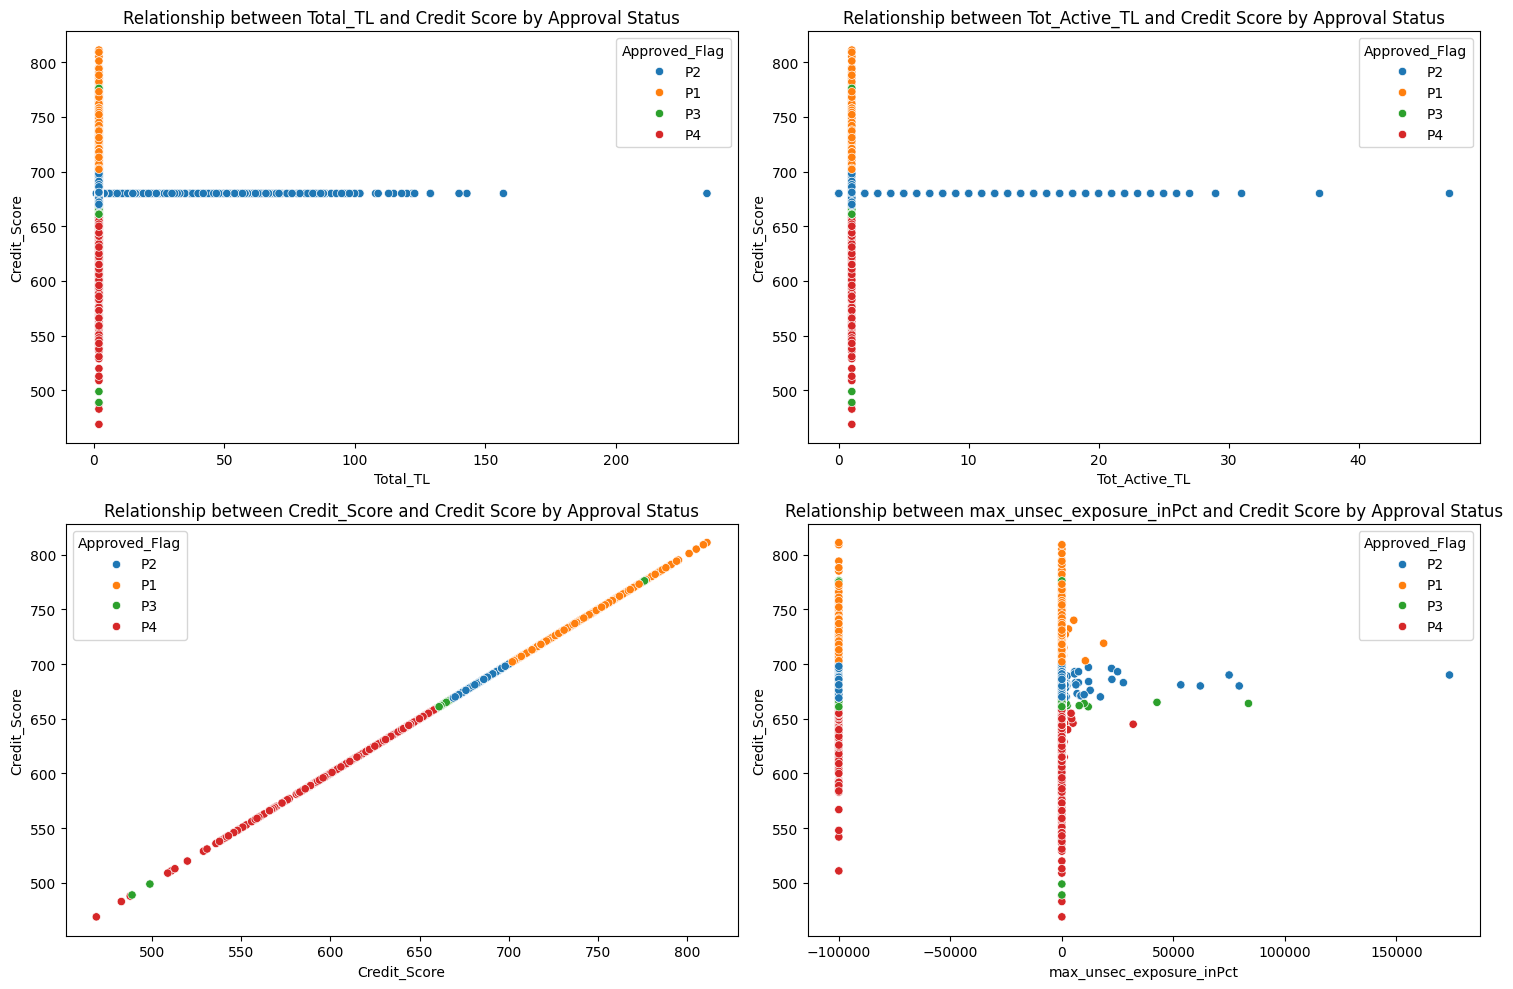

In [15]:
# Selecting numerical and categorical columns for analysis
numerical_cols = credit_risk_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = credit_risk_data.select_dtypes(include=['object']).columns

# Calculate the number of rows needed for subplots based on the number of numerical columns
num_rows = (len(numerical_cols) - 1) 

# Display histograms for numerical features
plt.figure(figsize=(20, num_rows * 3))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 5, i + 1)
    sns.histplot(credit_risk_data[col], kde=False)
    plt.title(col)
    plt.tight_layout()
plt.show()

# Display box plots for numerical features to identify outliers
plt.figure(figsize=(20, num_rows * 3))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 5, i + 1)
    sns.boxplot(x='Approved_Flag', y=col, data=credit_risk_data)
    plt.title(col)
    plt.tight_layout()
plt.show()

# Analyzing categorical variables with respect to the target variable
num_rows_cat = (len(categorical_cols) - 1) // 5 + 1
plt.figure(figsize=(20, num_rows_cat * 3))
for i, col in enumerate(categorical_cols):
    if col != 'Approved_Flag':  # Exclude the target variable itself
        plt.subplot(num_rows_cat, 5, i + 1)
        sns.countplot(x=col, hue='Approved_Flag', data=credit_risk_data)
        plt.title(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
correlation_matrix = credit_risk_data[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Scatter plots to explore relationships between some selected numerical features and the target
# Selecting a few potentially interesting numerical features for scatter plots
selected_features = ['Total_TL', 'Tot_Active_TL', 'Credit_Score', 'max_unsec_exposure_inPct']
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=col, y='Credit_Score', hue='Approved_Flag', data=credit_risk_data)
    plt.title(f'Relationship between {col} and Credit Score by Approval Status')
    plt.tight_layout()
plt.show()

In [16]:
# Copy the DataFrame for processing
credit_risk_fe = credit_risk_data.copy()

# Remove the ID column as it is not useful for modeling
credit_risk_fe.drop('PROSPECTID', axis=1, inplace=True)

In [17]:
# Feature Engineering: Creating new features

# 1. Ratios of different types of credit accounts
credit_risk_fe['Secured_to_Unsecured_Ratio'] = credit_risk_fe['Secured_TL'] / (credit_risk_fe['Unsecured_TL'] + 0.01)
credit_risk_fe['Active_to_Closed_TL_Ratio'] = credit_risk_fe['Tot_Active_TL'] / (credit_risk_fe['Tot_Closed_TL'] + 0.01)

# 2. Debt-to-income ratio (assuming 'NETMONTHLYINCOME' is monthly income and 'pct_currentBal_all_TL' is the percentage of total loan to income)
credit_risk_fe['Debt_to_Income_Ratio'] = credit_risk_fe['pct_currentBal_all_TL'] / (credit_risk_fe['NETMONTHLYINCOME'] + 0.01)

# 3. Time since last delinquency as a proportion of credit history length
credit_risk_fe['Delinquency_to_Credit_History_Ratio'] = credit_risk_fe['time_since_recent_deliquency'] / (credit_risk_fe['Age_Oldest_TL'] + 0.01)

# 4. Interaction terms between relevant features
credit_risk_fe['Interaction_Credit_Score_Unsec_Exposure'] = credit_risk_fe['Credit_Score'] * credit_risk_fe['max_unsec_exposure_inPct']
credit_risk_fe['Interaction_Income_Credit_Score'] = credit_risk_fe['NETMONTHLYINCOME'] * credit_risk_fe['Credit_Score']

In [18]:
# Display the head of the DataFrame to check the new features
credit_risk_fe.head()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag,Secured_to_Unsecured_Ratio,Active_to_Closed_TL_Ratio,Debt_to_Income_Ratio,Delinquency_to_Credit_History_Ratio,Interaction_Credit_Score_Unsec_Exposure,Interaction_Income_Credit_Score
0,5.0,4.0,1.0,0.0,0.0,0.000,0.0,0.200,0.800,0.0,...,others,others,680.0,P2,0.249377,0.249377,0.000027,-1388.682127,226.44,15640000.0
1,1.0,0.0,1.0,0.0,0.0,0.000,0.0,1.000,0.000,1.0,...,others,others,680.0,P2,0.000000,100.000000,0.000027,-14265.192582,226.44,15640000.0
2,8.0,0.0,8.0,1.0,0.0,0.125,0.0,1.000,0.000,2.0,...,others,others,680.0,P2,0.332779,800.000000,0.000027,-2127.185705,226.44,15640000.0
3,1.0,0.0,1.0,1.0,0.0,1.000,0.0,1.000,0.000,1.0,...,others,others,680.0,P2,0.000000,100.000000,0.000027,-19959.880240,226.44,15640000.0
4,3.0,2.0,1.0,0.0,0.0,0.000,0.0,0.333,0.667,0.0,...,others,others,680.0,P2,300.000000,0.497512,0.000027,-763.292878,226.44,15640000.0


In [20]:
# Export to a CSV file
credit_risk_fe.to_csv('credit_risk_features.csv', index=False)

print("DataFrame successfully exported to credit_risk_features.csv")

DataFrame successfully exported to credit_risk_features.csv
